# EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer, PolynomialFeatures

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data/train_merge.csv', index_col=0)
df_test = pd.read_csv('clean_data/test_merge.csv', index_col=0)

In [3]:
print('Train: ', df.shape)
print('Test:  ', df_test.shape)

Train:  (75000, 89)
Test:   (25000, 88)


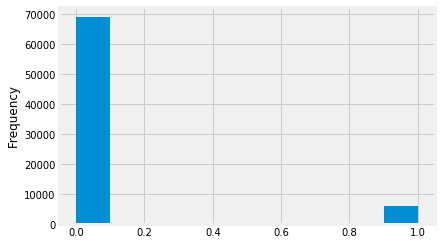

In [4]:
df.TARGET.plot.hist()
plt.show()

Note that the data is very imbalanced.

### Missing Values

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The data has" + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

The data has89 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,52382,69.8
NONLIVINGAPARTMENTS_AVG,52003,69.3
FONDKAPREMONT_MODE,51184,68.2
FLOORSMIN_AVG,50791,67.7
FLOORSMIN_MODE,50791,67.7
YEARS_BUILD_AVG,49740,66.3
OWN_CAR_AGE,49468,66.0
LANDAREA_AVG,44522,59.4
BASEMENTAREA_AVG,43904,58.5
EXT_SOURCE_1,42213,56.3


### Types of Features

In [7]:
numeric_cols = df.select_dtypes(['int', 'float']).columns.tolist()
bool_cols = df.select_dtypes(['bool']).columns.tolist()
obj_cols = df.select_dtypes(['object']).columns.tolist()

In [8]:
print(f'Numeric: {len(numeric_cols)}')
print(f'Object: {len(obj_cols)}')
print(f'Bool: {len(bool_cols)}')

Numeric: 54
Object: 13
Bool: 22


## Numeric

In [9]:
df[numeric_cols].isna().sum()

TARGET                             0
AMT_REQ_CREDIT_BUREAU_QRT      10100
APARTMENTS_AVG                 37989
DAYS_BIRTH                         0
EMERGENCYSTATE_MODE            35521
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE         257
DAYS_LAST_PHONE_CHANGE             0
BASEMENTAREA_AVG               43904
ENTRANCES_AVG                  37644
CNT_CHILDREN                       0
OWN_CAR_AGE                    49468
TOTALAREA_MODE                 36148
FLOORSMIN_AVG                  50791
FLOORSMIN_MODE                 50791
NONLIVINGAREA_AVG              41237
LANDAREA_AVG                   44522
DAYS_ID_PUBLISH                    0
ELEVATORS_AVG                  39875
COMMONAREA_MODE                52382
AMT_REQ_CREDIT_BUREAU_HOUR     10100
REGION_POPULATION_RELATIVE         0
NONLIVINGAPARTMENTS_AVG        52003
DAYS_EMPLOYED                      0
CNT_FAM_MEMBERS                    1
REGION_RATING_CLIENT_W_CITY        0
EXT_SOURCE_1                   42213
D

In [10]:
# replace all with the mean
#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

## Object

In [11]:
for col in obj_cols:
    print(col, '\n', '-'*30)
    print(df[col].value_counts())
    print('\n')

NAME_EDUCATION_TYPE 
 ------------------------------
Secondary / secondary special    53126
Higher education                 18353
Incomplete higher                 2496
Lower secondary                    990
Academic degree                     35
Name: NAME_EDUCATION_TYPE, dtype: int64


NAME_INCOME_TYPE 
 ------------------------------
Working                 38757
Commercial associate    17426
Pensioner               13564
State servant            5242
Unemployed                  8
Student                     2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64


FONDKAPREMONT_MODE 
 ------------------------------
reg oper account         17984
reg oper spec account     2999
not specified             1457
org spec account          1376
Name: FONDKAPREMONT_MODE, dtype: int64


ORGANIZATION_TYPE 
 ------------------------------
Business Entity Type 3    16459
XNA                       13569
Self-employed              9415
Other                      3981
Medicine       

In [12]:
for col in obj_cols:
    df[col].fillna("NA_" + col, inplace=True)
    df_test[col].fillna("NA_" + col, inplace=True)

In [13]:
# Train
df_onehot = pd.get_dummies(df[obj_cols], prefix='ONEHOT_')
df_onehot.columns = df_onehot.columns.str.upper()

df.drop(obj_cols, axis=1, inplace=True)
df = pd.merge(df, df_onehot, left_index=True, right_index=True)

# Test
df_test_onehot = pd.get_dummies(df_test[obj_cols], prefix='ONEHOT_')
df_test_onehot.columns = df_test_onehot.columns.str.upper()

df_test.drop(obj_cols, axis=1, inplace=True)
df_test = pd.merge(df_test, df_test_onehot, left_index=True, right_index=True)

In [14]:
print('Train: ', df.shape)
print('Test:  ', df_test.shape)

Train:  (75000, 231)
Test:   (25000, 227)


Note these are not the same since there is data not represented in the testing set.

In [15]:
# align the dataframes
train_lables = df['TARGET']
df, df_test = df.align(df_test, join='inner', axis=1)

# add back target from join
df['TARGET'] = train_lables

In [16]:
print('Train: ', df.shape)
print('Test:  ', df_test.shape)

Train:  (75000, 264)
Test:   (25000, 263)


### Anomalies

In [17]:
(df['DAYS_BIRTH'] / -365).describe()

count    75000.000000
mean        43.956013
std         11.960561
min         20.517808
25%         34.004795
50%         43.178082
75%         53.950685
max         69.041096
Name: DAYS_BIRTH, dtype: float64

In [18]:
df.DAYS_EMPLOYED.describe() # BAD DATA

count     75000.000000
mean      64120.512867
std      141538.466198
min      -17546.000000
25%       -2773.000000
50%       -1218.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

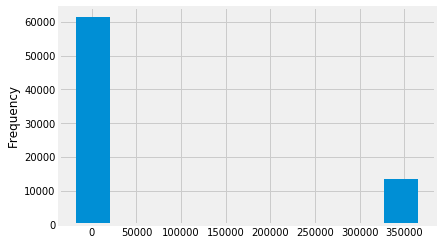

In [19]:
df.DAYS_EMPLOYED.plot.hist()
plt.show()

In [20]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]


print('The non-anomalies default on %0.2f%% of loans' % (100 * df['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * df['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(df))

The non-anomalies default on 7.99% of loans
The anomalies default on 7.99% of loans
There are 75000 anomalous days of employment


In [21]:
# FIXME : impute choose better
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace({365243.000000: np.nan})

df['DAYS_EMPLOYED_ANOM'] =  df["DAYS_EMPLOYED"].isna()
df_test['DAYS_EMPLOYED_ANOM'] =  df_test["DAYS_EMPLOYED"].isna()

df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].replace({365243.000000: np.nan})

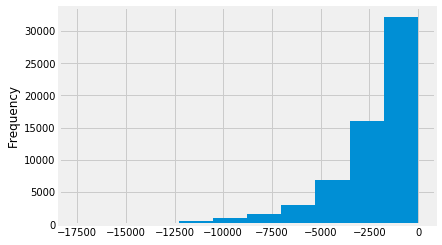

In [22]:
df.DAYS_EMPLOYED.plot.hist()
plt.show()

## Correlations

In [23]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].abs().sort_values(ascending=False)
correlations[:15]

TARGET                                   1.000000
EXT_SOURCE_3                             0.176517
EXT_SOURCE_2                             0.163760
EXT_SOURCE_1                             0.152267
DAYS_BIRTH                               0.081412
DAYS_EMPLOYED                            0.072865
REGION_RATING_CLIENT_W_CITY              0.064241
REGION_RATING_CLIENT                     0.061960
ONEHOT__HIGHER EDUCATION                 0.059720
DAYS_LAST_PHONE_CHANGE                   0.057873
DAYS_ID_PUBLISH                          0.056547
ONEHOT__WORKING                          0.054532
CODE_GENDER                              0.052054
ONEHOT__SECONDARY / SECONDARY SPECIAL    0.051104
REG_CITY_NOT_WORK_CITY                   0.050482
Name: TARGET, dtype: float64

In [24]:
# Find the correlation of the positive days since birth and target
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df_test['DAYS_BIRTH'] = abs(df_test['DAYS_BIRTH'])
df['DAYS_BIRTH'].corr(df['TARGET'])

-0.08141163185995004

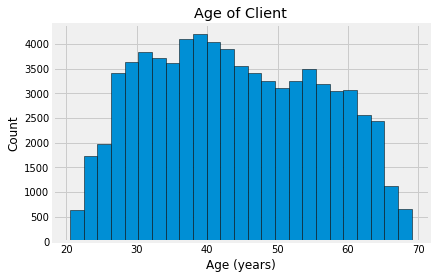

In [25]:
# Plot the distribution of ages in years
plt.hist(df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

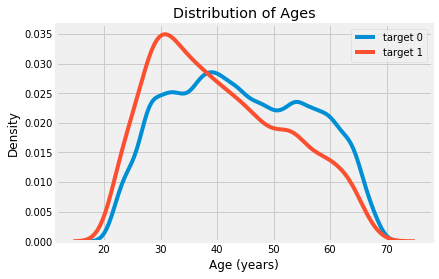

In [26]:
# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages');

The `EXT_SOURCE` features have the highest correlation by far

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.152267,-0.163760,-0.176517,-0.081412
EXT_SOURCE_1,-0.152267,1.000000,0.209920,0.181033,0.596296
EXT_SOURCE_2,-0.163760,0.209920,1.000000,0.112770,0.087071
EXT_SOURCE_3,-0.176517,0.181033,0.112770,1.000000,0.201564
DAYS_BIRTH,-0.081412,0.596296,0.087071,0.201564,1.000000


## Feature Engineering

"applied machine learning is basically feature engineering." -Andrew Ng

### Polynomial Features


In [28]:
poly_features = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = df_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_target = df['TARGET']

In [29]:
# hadle missing values
imputer = Imputer(strategy='median')
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [30]:
# train
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

In [31]:
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (75000, 35)


In [32]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

Now we can check if correlated with target

In [33]:
poly_features = pd.DataFrame(poly_features,
        columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']),
    )

poly_features_test = pd.DataFrame(poly_features_test,
        columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']),
    )

In [34]:
poly_features.index = df.index
poly_features_test.index = df_test.index

poly_features['TARGET'] = df['TARGET']
poly_features.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', '1'], axis=1, inplace=True)
poly_features_test.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', '1'], axis=1, inplace=True)

In [35]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.194693
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.190301
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.182664
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.177336
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172755
EXT_SOURCE_1 EXT_SOURCE_2                -0.168233
EXT_SOURCE_1 EXT_SOURCE_3                -0.163740
EXT_SOURCE_2 DAYS_BIRTH                  -0.160256
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.158287
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH     -0.157983
Name: TARGET, dtype: float64
EXT_SOURCE_1^2   -0.090253
EXT_SOURCE_1^3   -0.082783
DAYS_BIRTH^2     -0.078783
DAYS_BIRTH^3     -0.075509
TARGET            1.000000
Name: TARGET, dtype: float64


In [36]:
poly_features.drop('TARGET', axis=1, inplace=True)

In [37]:
df = df.merge(poly_features, on='SK_ID_CURR', how='left')
df_test = df_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

In [38]:
df.to_csv('clean_data/train_eda.csv')
df_test.to_csv('clean_data/test_eda.csv')